In [30]:
#read ACMEOrdersData.csv
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy.stats import pearsonr
from itertools import combinations

df = pd.read_csv('ACMEOrdersData.csv')
print(df.head())

      Week  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
0   1/4/22     2288      65     3538      1179       17006      3245   
1  1/11/22     2580      74     4339      1341       19871      3848   
2  1/18/22     2532      87     4228      1333       19069      3863   
3  1/25/22     2639      70     4328      1299       19513      3672   
4   2/1/22     2458      54     4168      1256       18470      3588   

   Connecticut  Delaware  Florida  ...  Tennessee  Texas  Utah  Vermont  \
0         2315       721    15513  ...       3692  11850  1556      416   
1         2930       925    18418  ...       4225  13983  1836      539   
2         2724       884    18101  ...       3994  13918  1769      450   
3         2676       901    18282  ...       4097  13902  1759      503   
4         2624       800    17538  ...       3812  13345  1681      444   

   Virginia  Washington  Washington, District of Columbia  West Virginia  \
0      4946        3567                 

In [22]:
#calculate a total for each row with .drop('Week', axis=1)
df['Total'] = df.drop('Week', axis=1).sum(axis=1)
print(df.head())


      Week  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
0   1/4/22     2288      65     3538      1179       17006      3245   
1  1/11/22     2580      74     4339      1341       19871      3848   
2  1/18/22     2532      87     4228      1333       19069      3863   
3  1/25/22     2639      70     4328      1299       19513      3672   
4   2/1/22     2458      54     4168      1256       18470      3588   

   Connecticut  Delaware  Florida  ...  Texas  Utah  Vermont  Virginia  \
0         2315       721    15513  ...  11850  1556      416      4946   
1         2930       925    18418  ...  13983  1836      539      5937   
2         2724       884    18101  ...  13918  1769      450      5605   
3         2676       901    18282  ...  13902  1759      503      5728   
4         2624       800    17538  ...  13345  1681      444      5526   

   Washington  Washington, District of Columbia  West Virginia  Wisconsin  \
0        3567                               5

In [3]:
#for each  "Delaware Kansas Kentucky Tennessee Missouri Montana Arkansas Mississippi New Mexico" columns, calculate correlation with the 'Total' column
states = [ 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']
for state in states:
    print(state, df['Total'].corr(df[state]))
    

Kansas 0.9785317850698719
Kentucky 0.9862667579532222
Tennessee 0.9872409400444648
Missouri 0.9905388497452231
Montana 0.9607981816159155
Arkansas 0.9796799365676143
Mississippi 0.9715536424661669
New Mexico 0.9846793156793581


In [4]:
#regress Y = 'Total' and X = states
import statsmodels.api as sm
X = df[states]
X = sm.add_constant(X)
y = df['Total']
model = sm.OLS(y, X).fit()
print(model.summary())
#print R-squared with more digits
print('R-squared:', model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1982.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          4.07e-102
Time:                        13:03:41   Log-Likelihood:                -980.29
No. Observations:                 104   AIC:                             1979.
Df Residuals:                      95   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4934.7029   1982.155     -2.490      

In [21]:
#regress Y = 'Total' and X = states
import statsmodels.api as sm
X = df[[ 'Tennessee', 'Montana',  'New Mexico','Missouri']]
X = sm.add_constant(X)
y = df['Total']
model = sm.OLS(y, X).fit()
print(model.summary())
#print R-squared with more digits
print('R-squared:', model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3904.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          5.83e-108
Time:                        13:06:58   Log-Likelihood:                -983.20
No. Observations:                 104   AIC:                             1976.
Df Residuals:                      99   BIC:                             1990.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4459.7248   1687.272     -2.643      0.0

### Reformat the data into four week moving window 

In [31]:
# Get all column names except for 'Week'
states = df.columns.drop('Week')

# Create a new DataFrame to store the results
df1 = pd.DataFrame()

# For each state in the list, calculate the 4-week rolling average and store the results in the new DataFrame
for state in states:
    # Calculate the rolling mean with a window size of 4 weeks, allowing calculation even if all 4 values aren't present
    df1[state] = df[state].rolling(window=4, min_periods=1).mean()

# to make sure that all average are based on the four week level
df1 = df1[3:].reset_index(drop=True)
df1['average'] = df1.mean(axis=1)
df1.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,Utah,Vermont,Virginia,Washington,"Washington, District of Columbia",West Virginia,Wisconsin,Wyoming,average
0,2509.75,74.00,4108.25,1288.00,18864.75,3657.00,2661.25,857.75,17578.50,6842.00,...,13413.25,1730.00,477.00,5554.00,4104.75,627.25,695.25,2763.25,330.50,3666.475490
1,2552.25,71.25,4265.75,1307.25,19230.75,3742.75,2738.50,877.50,18084.75,7049.00,...,13787.00,1761.25,484.00,5699.00,4219.50,621.50,723.00,2785.50,333.25,3740.225490
2,2485.75,72.00,4175.50,1250.75,18711.00,3614.75,2616.50,858.25,17753.00,6846.00,...,13356.25,1715.75,456.75,5504.75,4120.00,613.50,726.50,2743.75,312.75,3627.602941
3,2574.75,66.75,4323.25,1274.25,19282.50,3712.50,2654.50,913.25,18155.75,7062.50,...,13731.50,1779.50,472.25,5765.50,4287.25,622.25,754.25,2805.00,322.75,3735.093137
4,2531.00,65.75,4256.50,1276.00,18715.50,3636.75,2627.25,905.75,17673.00,6985.25,...,13495.25,1753.75,451.25,5698.25,4153.75,598.75,759.75,2784.50,299.75,3670.681373


In [32]:
# Linear regression using all treatment to check the p-value
states = [ 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']

X = df1[states]  # Predictor variables
y = df1['average']  # Response variable

# Add a constant term to the predictor variables X because OLS does not include it by default
X = sm.add_constant(X)

# Create an OLS model with Y as the dependent variable and X as the independent variables
model = sm.OLS(y, X).fit()



In [33]:
# Print the summary of the model to see the results of the regression
print(model.summary())   

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2490.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          5.38e-104
Time:                        01:55:47   Log-Likelihood:                -512.16
No. Observations:                 101   AIC:                             1042.
Df Residuals:                      92   BIC:                             1066.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -132.9360     45.026     -2.952      

In [34]:
#[ 'Missouri', 'Montana', 'New Mexico'] are the most significant ones 

### Compare the difference between the 4th state choice 

In [35]:
states = [ 'Missouri', 'Montana', 'New Mexico', 'Tennessee']

X = df1[states]  # Predictor variables
y = df1['average']  # Response variable

# Add a constant term to the predictor variables X because OLS does not include it by default
X = sm.add_constant(X)

# Create an OLS model with Y as the dependent variable and X as the independent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model to see the results of the regression
print(model.summary())   

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4893.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          5.44e-110
Time:                        01:56:05   Log-Likelihood:                -515.20
No. Observations:                 101   AIC:                             1040.
Df Residuals:                      96   BIC:                             1053.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -112.1065     34.495     -3.250      0.0

In [36]:
# the selected group has the highest adjusted R square and all variables are significant 
# add the 5th state will not help to increase adjusted R square so we stop at 4

### check the proportion of the sum of selected states' values to the national

In [37]:
def calculate_proportion(states, national):
    """
    Calculate the proportion of the sum of selected states' values to the national sum over the dataset.
    
    """
    # Summing the values for the specified states across all rows and then summing across columns
    state_sum = df1[list(states)].sum().sum()  
    # Summing the national values across all rows
    national_sum = (df1['average'].sum())*51
    # Calculating the proportion of state sum to national sum
    proportion = state_sum / national_sum
    return proportion

# List of states considered for treatment
treatment_states = ['Missouri', 'Montana', 'New Mexico','Tennessee','Kansas', 'Kentucky','Arkansas', 'Mississippi']

# List to store the results
results = []

# Iterate over combinations of 4
for r in range(4, 5):  # This range will only include 3 because it's non-inclusive of the stop
    for combo in combinations(treatment_states, r):
        # Calculate the proportion of the sum of the state's values to the national total
        proportion = calculate_proportion(combo, 'National')*100
        # Append the results to the list
        results.append({'Combination': combo,  'Proportion': proportion})
        
for result in results:
    print(f"Combination: {result['Combination']}, Proportion: {result['Proportion']:.4f}")

Combination: ('Missouri', 'Montana', 'New Mexico', 'Tennessee'), Proportion: 4.5169
Combination: ('Missouri', 'Montana', 'New Mexico', 'Kansas'), Proportion: 2.9872
Combination: ('Missouri', 'Montana', 'New Mexico', 'Kentucky'), Proportion: 3.4439
Combination: ('Missouri', 'Montana', 'New Mexico', 'Arkansas'), Proportion: 3.0102
Combination: ('Missouri', 'Montana', 'New Mexico', 'Mississippi'), Proportion: 3.0190
Combination: ('Missouri', 'Montana', 'Tennessee', 'Kansas'), Proportion: 4.6857
Combination: ('Missouri', 'Montana', 'Tennessee', 'Kentucky'), Proportion: 5.1424
Combination: ('Missouri', 'Montana', 'Tennessee', 'Arkansas'), Proportion: 4.7086
Combination: ('Missouri', 'Montana', 'Tennessee', 'Mississippi'), Proportion: 4.7175
Combination: ('Missouri', 'Montana', 'Kansas', 'Kentucky'), Proportion: 3.6127
Combination: ('Missouri', 'Montana', 'Kansas', 'Arkansas'), Proportion: 3.1789
Combination: ('Missouri', 'Montana', 'Kansas', 'Mississippi'), Proportion: 3.1878
Combination: (

### For each 8 weeks (rows) rolling window

In [6]:
# run df[[ 'Kansas', 'Missouri', 'Montana', 'Arkansas', 'New Mexico']], against 'Total' for each 8 weeks (rows) rolling window
for i in range(len(df)-15, len(df)-8):
    X = df[[  'Missouri', 'Montana', 'New Mexico']].iloc[i:i+8]
    X = sm.add_constant(X)
    y = df['Total'].iloc[i:i+8]
    model = sm.OLS(y, X).fit()
    print('8 Weeks starting at', df['Week'].iloc[i])
    print('R-squared:', model.rsquared)
    print('')

8 Weeks starting at 9/19/23
R-squared: 0.9611888161662625

8 Weeks starting at 9/26/23
R-squared: 0.9769370894018045

8 Weeks starting at 10/3/23
R-squared: 0.9983549894641313

8 Weeks starting at 10/10/23
R-squared: 0.9982251551035608

8 Weeks starting at 10/17/23
R-squared: 0.9981106008026255

8 Weeks starting at 10/24/23
R-squared: 0.9990938379176004

8 Weeks starting at 10/31/23
R-squared: 0.9995837516932854



In [7]:
#regress Y = 'Total' and X = states
import statsmodels.api as sm
X = df[[ 'Missouri', 'Montana',  'New Mexico']]
X = sm.add_constant(X)
y = df['Total']
model = sm.OLS(y, X).fit()
print(model.summary())
#print R-squared with more digits
print('R-squared:', model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4336.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.07e-105
Time:                        13:03:41   Log-Likelihood:                -993.16
No. Observations:                 104   AIC:                             1994.
Df Residuals:                     100   BIC:                             2005.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -493.3259   1584.651     -0.311      0.7

In [8]:
# run through all combination of [ 'Missouri', 'Montana',  'New Mexico']

from itertools import combinations
states = [ 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']
for i in range(1, len(states)+1):
    for combo in combinations(states, i):
        X = df[list(combo)]
        X = sm.add_constant(X)
        y = df['Total']
        model = sm.OLS(y, X).fit()
        print('Columns:', combo)
        print('R-squared:', model.rsquared)
        print('')

Columns: ('Kansas',)
R-squared: 0.9575244543920296

Columns: ('Kentucky',)
R-squared: 0.9727221178435601

Columns: ('Tennessee',)
R-squared: 0.9746446736998778

Columns: ('Missouri',)
R-squared: 0.9811672128545903

Columns: ('Montana',)
R-squared: 0.92313314579645

Columns: ('Arkansas',)
R-squared: 0.9597727781131253

Columns: ('Mississippi',)
R-squared: 0.9439164801892768

Columns: ('New Mexico',)
R-squared: 0.9695933547267689

Columns: ('Kansas', 'Kentucky')
R-squared: 0.9833311411203719

Columns: ('Kansas', 'Tennessee')
R-squared: 0.9836691768934849

Columns: ('Kansas', 'Missouri')
R-squared: 0.9813037415474694

Columns: ('Kansas', 'Montana')
R-squared: 0.9743572623219079

Columns: ('Kansas', 'Arkansas')
R-squared: 0.975527527415917

Columns: ('Kansas', 'Mississippi')
R-squared: 0.9679840256344019

Columns: ('Kansas', 'New Mexico')
R-squared: 0.9821322727868145

Columns: ('Kentucky', 'Tennessee')
R-squared: 0.979388425442764

Columns: ('Kentucky', 'Missouri')
R-squared: 0.9856453019

In [23]:
# run through all combination of [ 'Missouri', 'Montana',  'New Mexico']

from itertools import combinations
states = ['Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']


for combo in combinations(states, 5):
    min_r_squared = 1
    total_r_squared = 0
    # run df[[ 'Kansas', 'Missouri', 'Montana', 'Arkansas', 'New Mexico']], against 'Total' for each 8 weeks (rows) rolling window
    for i in range(0, len(df)-8):
        X = df[list(combo)].iloc[i:i+8]
        X = sm.add_constant(X)
        y = df['Total'].iloc[i:i+8]
        model = sm.OLS(y, X).fit()
        min_r_squared = min(min_r_squared, model.rsquared)
        total_r_squared += model.rsquared
    print('Columns:', combo)
    print('min R-squared:', min_r_squared)
    print('average R-squared:', total_r_squared/(len(df)-8))
    print('')

Columns: ('Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana')
min R-squared: 0.8839931057808613
average R-squared: 0.9859400371179765

Columns: ('Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Arkansas')
min R-squared: 0.8478090760686441
average R-squared: 0.9824313016229463

Columns: ('Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Mississippi')
min R-squared: 0.8481170271574286
average R-squared: 0.9833884567956906

Columns: ('Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'New Mexico')
min R-squared: 0.8567124628411337
average R-squared: 0.9883539236220567

Columns: ('Kansas', 'Kentucky', 'Tennessee', 'Montana', 'Arkansas')
min R-squared: 0.771773970427055
average R-squared: 0.9825436401879472

Columns: ('Kansas', 'Kentucky', 'Tennessee', 'Montana', 'Mississippi')
min R-squared: 0.8374259343384283
average R-squared: 0.9855102751025863

Columns: ('Kansas', 'Kentucky', 'Tennessee', 'Montana', 'New Mexico')
min R-squared: 0.8128249949603977
average R-squared: 0.9902084384471258

C

In [10]:
# run through all combination of ['Delaware', 'Missouri', 'Montana',  'New Mexico']

from itertools import combinations
states = ['Delaware', 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']
for i in range(1, len(states)+1):
    for combo in combinations(states, i):
        X = df[list(combo)]
        X = sm.add_constant(X)
        y = df['Total']
        model = sm.OLS(y, X).fit()
        print('Columns:', combo)
        print('R-squared:', model.rsquared)
        print('')

Columns: ('Delaware',)
R-squared: 0.9199326505499791

Columns: ('Kansas',)
R-squared: 0.9575244543920296

Columns: ('Kentucky',)
R-squared: 0.9727221178435601

Columns: ('Tennessee',)
R-squared: 0.9746446736998778

Columns: ('Missouri',)
R-squared: 0.9811672128545903

Columns: ('Montana',)
R-squared: 0.92313314579645

Columns: ('Arkansas',)
R-squared: 0.9597727781131253

Columns: ('Mississippi',)
R-squared: 0.9439164801892768

Columns: ('New Mexico',)
R-squared: 0.9695933547267689

Columns: ('Delaware', 'Kansas')
R-squared: 0.9867388746216716

Columns: ('Delaware', 'Kentucky')
R-squared: 0.9766262239208091

Columns: ('Delaware', 'Tennessee')
R-squared: 0.9788415110784994

Columns: ('Delaware', 'Missouri')
R-squared: 0.9903242387280703

Columns: ('Delaware', 'Montana')
R-squared: 0.9503068256064636

Columns: ('Delaware', 'Arkansas')
R-squared: 0.9785972330899856

Columns: ('Delaware', 'Mississippi')
R-squared: 0.9788993839721417

Columns: ('Delaware', 'New Mexico')
R-squared: 0.97802824

In [11]:
#regress Y = 'Total' and X = states
import statsmodels.api as sm
X = df[['Missouri', 'Montana']]
X = sm.add_constant(X)
y = df['Total']
model = sm.OLS(y, X).fit()
print(model.summary())
#print R-squared with more digits
print('R-squared:', model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     4010.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           6.06e-97
Time:                        13:03:59   Log-Likelihood:                -1018.6
No. Observations:                 104   AIC:                             2043.
Df Residuals:                     101   BIC:                             2051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.1490   1950.249      1.347      0.1

In [12]:
min_r_squared = 1
total_r_squared = 0
# run df[['Delaware', 'Kansas', 'Missouri', 'Montana', 'Arkansas', 'New Mexico']], against 'Total' for each 8 weeks (rows) rolling window
for i in range(0, len(df)-8):
    X = df[['Delaware',  'Missouri', 'Montana', 'New Mexico']].iloc[i:i+8]
    X = sm.add_constant(X)
    y = df['Total'].iloc[i:i+8]
    model = sm.OLS(y, X).fit()
    min_r_squared = min(min_r_squared, model.rsquared)
    total_r_squared += model.rsquared
print('min R-squared:', min_r_squared)
print('average R-squared:', total_r_squared/(len(df)-8))

min R-squared: 0.6987004763811291
average R-squared: 0.9792253765994524


In [13]:
min_r_squared = 1
total_r_squared = 0
# run df[['Delaware', 'Kansas', 'Missouri', 'Montana', 'Arkansas', 'New Mexico']], against 'Total' for each 8 weeks (rows) rolling window
for i in range(0, len(df)-8):
    X = df[[ 'Missouri', 'Montana', 'New Mexico']].iloc[i:i+8]
    X = sm.add_constant(X)
    y = df['Total'].iloc[i:i+8]
    model = sm.OLS(y, X).fit()
    min_r_squared = min(min_r_squared, model.rsquared)
    total_r_squared += model.rsquared
print('min R-squared:', min_r_squared)
print('average R-squared:', total_r_squared/(len(df)-8))

min R-squared: 0.6321617760871612
average R-squared: 0.9702797177756485


In [14]:
min_r_squared = 1
total_r_squared = 0
# run df[['Delaware', 'Kansas', 'Missouri', 'Montana', 'Arkansas', 'New Mexico']], against 'Total' for each 8 weeks (rows) rolling window
for i in range(0, len(df)-8):
    X = df[['Delaware',  'Missouri','New Mexico']].iloc[i:i+8]
    X = sm.add_constant(X)
    y = df['Total'].iloc[i:i+8]
    model = sm.OLS(y, X).fit()
    min_r_squared = min(min_r_squared, model.rsquared)
    total_r_squared += model.rsquared
print('min R-squared:', min_r_squared)
print('average R-squared:', total_r_squared/(len(df)-8))

min R-squared: 0.6931676747286036
average R-squared: 0.9700670546043714


In [15]:
min_r_squared = 1
total_r_squared = 0
# run df[['Delaware', 'Kansas', 'Missouri', 'Montana', 'Arkansas', 'New Mexico']], against 'Total' for each 8 weeks (rows) rolling window
for i in range(0, len(df)-8):
    X = df[['Missouri', 'Montana']].iloc[i:i+8]
    X = sm.add_constant(X)
    y = df['Total'].iloc[i:i+8]
    model = sm.OLS(y, X).fit()
    min_r_squared = min(min_r_squared, model.rsquared)
    total_r_squared += model.rsquared
print('min R-squared:', min_r_squared)
print('average R-squared:', total_r_squared/(len(df)-8))

min R-squared: 0.5602395748181191
average R-squared: 0.9476428652860392


In [16]:
min_r_squared = 1
total_r_squared = 0
# run df[['Delaware', 'Kansas', 'Missouri', 'Montana', 'Arkansas', 'New Mexico']], against 'Total' for each 8 weeks (rows) rolling window
for i in range(0, len(df)-8):
    X = df[[  'Missouri']].iloc[i:i+8]
    X = sm.add_constant(X)
    y = df['Total'].iloc[i:i+8]
    model = sm.OLS(y, X).fit()
    min_r_squared = min(min_r_squared, model.rsquared)
    total_r_squared += model.rsquared
print('min R-squared:', min_r_squared)
print('average R-squared:', total_r_squared/(len(df)-8))

min R-squared: 0.5426890525870329
average R-squared: 0.9248288057893403


## search for leakage

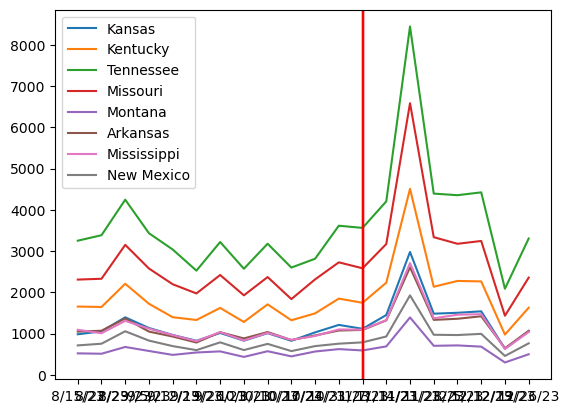

In [17]:
# plot the 9 states
import matplotlib.pyplot as plt
states = [ 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']
for state in states:
    #only last 20 rows
    plt.plot(df['Week'].iloc[-20:], df[state].iloc[-20:], label=state)
    #with vertical lines
    plt.axvline(x=df['Week'].iloc[-8], color='r')

plt.legend()
plt.show()

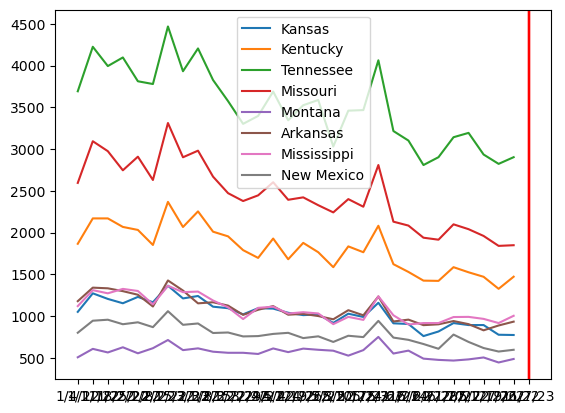

In [18]:
# plot the 9 states
import matplotlib.pyplot as plt
states = [ 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']
for state in states:
    #only last 20 rows
    plt.plot(df['Week'].iloc[:30], df[state].iloc[:30], label=state)
    #with vertical lines
    plt.axvline(x=df['Week'].iloc[-8], color='r')

plt.legend()
plt.show()

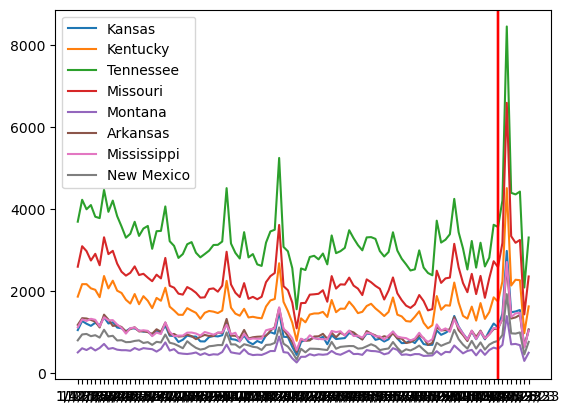

In [19]:
# plot the 9 states
import matplotlib.pyplot as plt
states = [ 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']
for state in states:
    #only last 20 rows
    plt.plot(df['Week'], df[state], label=state)
    #with vertical lines
    plt.axvline(x=df['Week'].iloc[-8], color='r')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


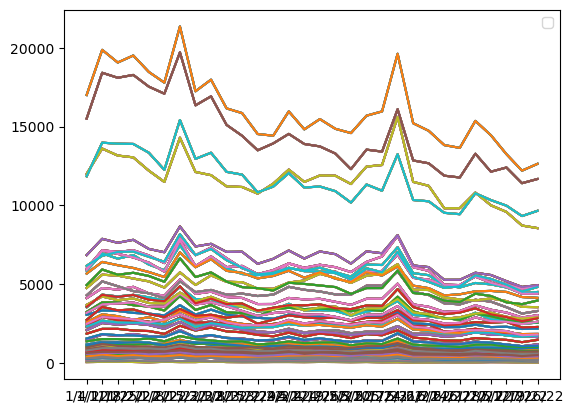

In [20]:
# plot the 9 states
import matplotlib.pyplot as plt
states = [ 'Kansas', 'Kentucky', 'Tennessee', 'Missouri', 'Montana', 'Arkansas', 'Mississippi', 'New Mexico']
for state in states:
    #only last 20 rows
    plt.plot(df['Week'].iloc[:30], df.drop(['Week','Total'],axis=1).iloc[:30])
    #with vertical lines
    #plt.axvline(x=df['Week'].iloc[-8], color='r')

plt.legend()
plt.show()